In [1]:
using QuantumOptics
using Plots

In [18]:
#using Random; Random.seed!(0)
κ = 1 # Decay rate

T_final = 10/κ
#tau_final = 10
step = 0.01
T = [0.00001:step:T_final ;]
#tau_list = [0:step:tau_final;]
basis = FockBasis(2)
a_atom = destroy(basis) ⊗ identityoperator(basis)
at_atom = create(basis) ⊗ identityoperator(basis)
a_cav = identityoperator(basis) ⊗ destroy(basis)
at_cav = identityoperator(basis) ⊗ create(basis)
n_atom = number(basis) ⊗ identityoperator(basis) 
n_cav = identityoperator(basis) ⊗ number(basis)
#H =  im/2 * (a_atom*at_cav-a_cav*at_atom)
#J = [sqrt(κ)*a_atom + a_cav]
0


0

In [19]:
psi_1 = fockstate(basis, 1)
rho_atom = psi_1 ⊗ dagger(psi_1)
psi_0 = fockstate(basis, 0)
rho_cav = psi_0 ⊗ dagger(psi_0)
rho = rho_atom ⊗ rho_cav
0

0

In [20]:
function f(t,rho)
    H = (identityoperator(basis) ⊗ identityoperator(basis)) + (-im/2 * (1/sqrt(exp(κ*t)-1)) * (κ) * ((at_atom*a_cav)-(at_cav*a_atom)))
    J = [((sqrt(κ)*a_atom) - ((1/sqrt(exp(κ*t)-1))*sqrt(κ)*a_cav))]
    Jdagger = [((sqrt(κ)*at_atom) - ((1/sqrt(exp(κ*t)-1))*sqrt(κ)*at_cav))]
    return H, J, Jdagger
end
tout, ρₜ = timeevolution.master_dynamic(T, rho , f)
0

0

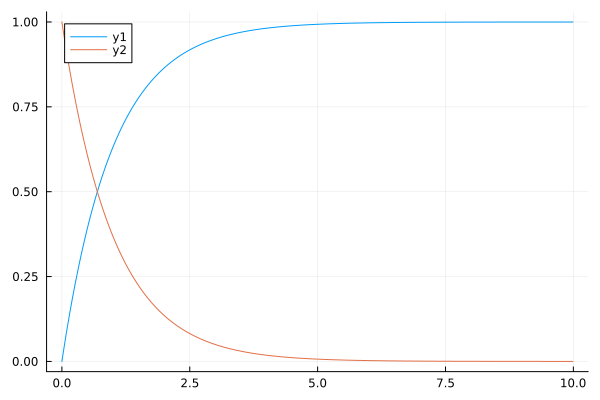

In [21]:
plot(T, abs.(expect(n_cav, ρₜ)))
plot!(T, abs.(expect(n_atom, ρₜ)))

In [6]:
tout, ρt_master = timeevolution.master(T, rho, H, J)
0

UndefVarError: UndefVarError: `H` not defined

In [ ]:
plot(real(expect(H, ρt_master)))

In [ ]:
T_size = Int(T_final/step + 1)
tau_size = Int(tau_final/step + 1)

corel_m = Array{ComplexF64}(undef, tau_size, T_size)
#corel_m .= 0.0
sigmae_t = Array{ComplexF64}(undef, tau_size, T_size)
#sigmae_t .= 0.0
sigmae_t_tau = Array{ComplexF64}(undef, tau_size, T_size)
#sigmae_t_tau .= 0.0

In [ ]:
for i=1:tau_size
    rhot = ρt_master[i]
    corel_m[i,:] = timecorrelations.correlation([0:step:T_final;], rhot, H, J, at, a) 
    sigmae_t[i,:] =  real(expect(n, ρt_master))[1:T_size]
    sigmae_t_tau[i,:] = real(expect(n, ρt_master))[i:T_size-1+i]
end

In [ ]:
G_34 = (sigmae_t .* sigmae_t_tau) .- ((corel_m).^2)
G_34_int = sum(G_34, dims=2)
denom = sum(((sigmae_t .* sigmae_t_tau)), dims=2)

In [ ]:
plot(real(sigmae_t[:,10]))

In [ ]:
plot(real((G_34_int)))

In [ ]:
plot(real(corel_m[1,:]))
plot!(real((corel_m.^2)[1,:]))